[Axes.scatter](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)

# 插图及简介

"scatter 是最简单的图表！"  
"scatter 是最直观的图表，符合人们对笛卡尔坐标的直觉认识。"  
"scatter 是散点图，……"

关于散点图人们有很多讨论，我也觉得这是一种简单到无法解释的图表，如果泛泛而谈那就是一堆废话，如果深入说明那是千言万语也难说清的。

所以直接动手就对了，没啥好bibilili的

# 手绘法

[How to Make a Scatter Plot](https://www.wikihow.com/Make-a-Scatter-Plot)



# 电子表格绘图法



# matplotlib法

In [2]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import inspect

我们在[matplotlib基础](https://zhuanlan.zhihu.com/p/147256790)中提过图表是由艺术家使用渲染器在画布上完成的。

而艺术家有两种类型：图元与容器。图元表示绘制在画布上的标准图形对象，如：Line2D，容器是放置图元的位置如：Axis，Axes和Figure。标准用法是创建一个Figure实例，使用Figure来创建一个或多个Axes或Subplot实例，并使用Axes实例的辅助方法创建图元。

Axes实例中有20个基础的辅助制图方法，包括plot, bar, scatter等方法。

散点图的首要目的是帮助人们直观的感受自变量与因变量的相关性。自变量与因变量自然也就是绘制散点图的必要参数，通过scatter方法的签名可以看出这一点。

数据将显示为点的集合，每个点的一个变量值确定水平轴上的位置，而另一个变量值确定垂直轴上的位置。

In [3]:
inspect.signature(Axes.scatter)

<Signature (self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

In [4]:
# fake data
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

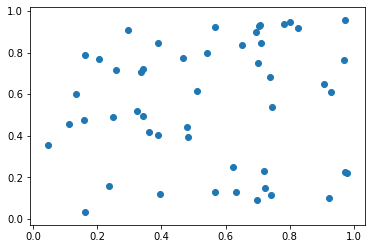

In [5]:
plt.scatter(x, y)

scatter相关基础知识  
- [Scatter plot](https://encyclopedia.thefreedictionary.com/scatter+plot)
- [Scatter plot : wikimili](https://wikimili.com/en/Scatter_plot)
- [A Complete Guide to Scatter Plots](https://chartio.com/learn/charts/what-is-a-scatter-plot/)

**wikipedia**  
To identify the type of relationship (if any) between two quantitative variables

John Herschel[1]

A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

散点图用于识别两个定量变量之间的关系类型。John Herschel是我们知道的第一个对散点图进行描述的人。

使用笛卡尔坐标系显示一组数据，通常是两个变量的值。如果对点进行了编码（颜色/形状/大小），则可以显示一个或多个附加变量。

c : array-like or list of colors or color, optional

The marker colors. Possible values:

- A scalar or sequence of n numbers to be mapped to colors using cmap and norm.
- A 2-D array in which the rows are RGB or RGBA.
- A sequence of colors of length n.
- A single color format string.

Note that c should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. If you want to specify the same RGB or RGBA value for all points, use a 2-D array with a single row. Otherwise, value- matching will have precedence in case of a size matching with x and y.

If you wish to specify a single color for all points prefer the color keyword argument.

Defaults to None. In that case the marker color is determined by the value of color, facecolor or facecolors. In case those are not specified or None, the marker color is determined by the next color of the Axes' current "shape and fill" color cycle. This cycle defaults to rcParams["axes.prop_cycle"] (default: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])).

s : scalar or array-like, shape (n, ), optional

The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

scatter方法的参数 c 用于定义点的颜色，参数 s 用于定义点的大小。

In [6]:
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2    # 0 to 15 point radii

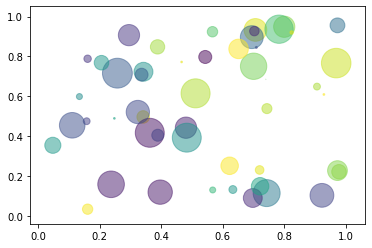

In [7]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

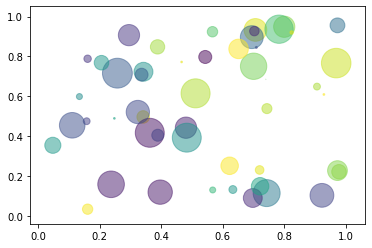

In [10]:
plt.scatter(x, y, area, colors, alpha=0.5)

[Scatter plot](https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py)  
例1.完成

“scatter真的的很简单，但是我的数据是表中的列啊！”

对于像numpy.recarry 或 pandas.DataFrame 这种类型的数据，matplotlib允许将其赋予data关键字参数，之后使用列名称字符串引用相应的数据。

In [8]:
data = {
    'a' : x,
    'b' : y,
    'c' : area,
    'd' : colors
}

[Text(0, 0.5, 'entry b'), Text(0.5, 0, 'entry a')]

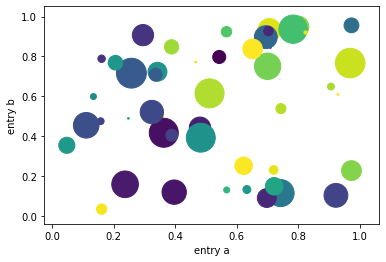

In [9]:
fig, ax = plt.subplots()
ax.scatter('a', 'b', s='c', c='d', data=data)
ax.set(xlabel='entry a', ylabel='entry b')

[Plotting with keywords](https://matplotlib.org/gallery/misc/keyword_plotting.html#sphx-glr-gallery-misc-keyword-plotting-py)  
例2.完成

Overview

A scatter plot can be used either when one continuous variable that is under the control of the experimenter and the other depends on it or when both continuous variables are independent. If a parameter exists that is systematically incremented and/or decremented by the other, it is called the control parameter or independent variable and is customarily plotted along the horizontal axis. The measured or dependent variable is customarily plotted along the vertical axis. If no dependent variable exists, either type of variable can be plotted on either axis and a scatter plot will illustrate only the degree of correlation (not causation) between two variables.

A scatter plot can suggest various kinds of correlations between variables with a certain confidence interval. For example, weight and height, weight would be on y axis and height would be on the x axis. Correlations may be positive (rising), negative (falling), or null (uncorrelated). If the pattern of dots slopes from lower left to upper right, it indicates a positive correlation between the variables being studied. If the pattern of dots slopes from upper left to lower right, it indicates a negative correlation. A line of best fit (alternatively called 'trendline') can be drawn in order to study the relationship between the variables. An equation for the correlation between the variables can be determined by established best-fit procedures. For a linear correlation, the best-fit procedure is known as linear regression and is guaranteed to generate a correct solution in a finite time. No universal best-fit procedure is guaranteed to generate a correct solution for arbitrary relationships. A scatter plot is also very useful when we wish to see how two comparable data sets agre to show nonlinear relationships between variables. The ability to do this can be enhanced by adding a smooth line such as LOESS.[5] Furthermore, if the data are represented by a mixture model of simple relationships, these relationships will be visually evident as superimposed patterns.

The scatter diagram is one of the seven basic tools of quality control.[6]

Scatter charts can be built in the form of bubble, marker, or/and line charts.[7]